## Q7: DECISION TREE CLASSIFICATION ON IRIS DATASET (sklearn)

In [4]:
# Cell 2: Import libraries for Q7
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Cell 3: Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dataset loaded and split successfully!")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Dataset loaded and split successfully!
Training samples: 120
Test samples: 30


In [6]:
# Cell 4: Train Decision Trees with different max_depth
print("\nTraining Decision Trees with different max_depth values:")
print("-"*50)

depth_values = [1, 2, 3]
results = {}

for depth in depth_values:
    # Create and train model
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)

    # Calculate accuracies
    train_acc = dt_model.score(X_train, y_train)
    test_acc = dt_model.score(X_test, y_test)

    results[depth] = {'train': train_acc, 'test': test_acc}

    print(f"\nMax Depth = {depth}:")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")


Training Decision Trees with different max_depth values:
--------------------------------------------------

Max Depth = 1:
  Training Accuracy: 0.6667
  Test Accuracy: 0.6667

Max Depth = 2:
  Training Accuracy: 0.9667
  Test Accuracy: 0.9333

Max Depth = 3:
  Training Accuracy: 0.9833
  Test Accuracy: 0.9667


In [7]:
# Cell 5: Analyze underfitting vs overfitting
print("\n" + "="*50)
print("UNDERFITTING vs OVERFITTING ANALYSIS")
print("="*50)

for depth in depth_values:
    train_acc = results[depth]['train']
    test_acc = results[depth]['test']
    gap = train_acc - test_acc

    print(f"\nDepth = {depth}:")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")
    print(f"  Gap (Train-Test): {gap:.4f}")

    if depth == 1:
        print("  → UNDERFITTING: Model too simple, low accuracy on both sets")
    elif depth == 3 and gap > 0.05:
        print("  → OVERFITTING: High train accuracy but lower test accuracy")
    else:
        print("  → BALANCED: Good generalization")


UNDERFITTING vs OVERFITTING ANALYSIS

Depth = 1:
  Train Accuracy: 0.6667
  Test Accuracy: 0.6667
  Gap (Train-Test): 0.0000
  → UNDERFITTING: Model too simple, low accuracy on both sets

Depth = 2:
  Train Accuracy: 0.9667
  Test Accuracy: 0.9333
  Gap (Train-Test): 0.0333
  → BALANCED: Good generalization

Depth = 3:
  Train Accuracy: 0.9833
  Test Accuracy: 0.9667
  Gap (Train-Test): 0.0167
  → BALANCED: Good generalization


## Q8. kNN Classification (sklearn)

In [8]:
# Cell 7: Import additional libraries for Q8
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Cell 8: Prepare data with only 2 features
# Use only sepal length and sepal width
X_2features = iris.data[:, :2]  # First two features only
y = iris.target

# Split the data
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2features, y, test_size=0.2, random_state=42, stratify=y
)

print("Using 2 features for visualization:")
print(f"  - {iris.feature_names[0]}")
print(f"  - {iris.feature_names[1]}")

Using 2 features for visualization:
  - sepal length (cm)
  - sepal width (cm)


In [10]:
# Cell 9: Train kNN models with different k values
k_values = [1, 3, 5, 10]
knn_models = {}

print("\nTraining kNN models:")
print("-"*30)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_2d, y_train_2d)
    knn_models[k] = knn

    accuracy = knn.score(X_test_2d, y_test_2d)
    print(f"k={k:2d}: Test Accuracy = {accuracy:.4f}")


Training kNN models:
------------------------------
k= 1: Test Accuracy = 0.6000
k= 3: Test Accuracy = 0.6667
k= 5: Test Accuracy = 0.7667
k=10: Test Accuracy = 0.8000


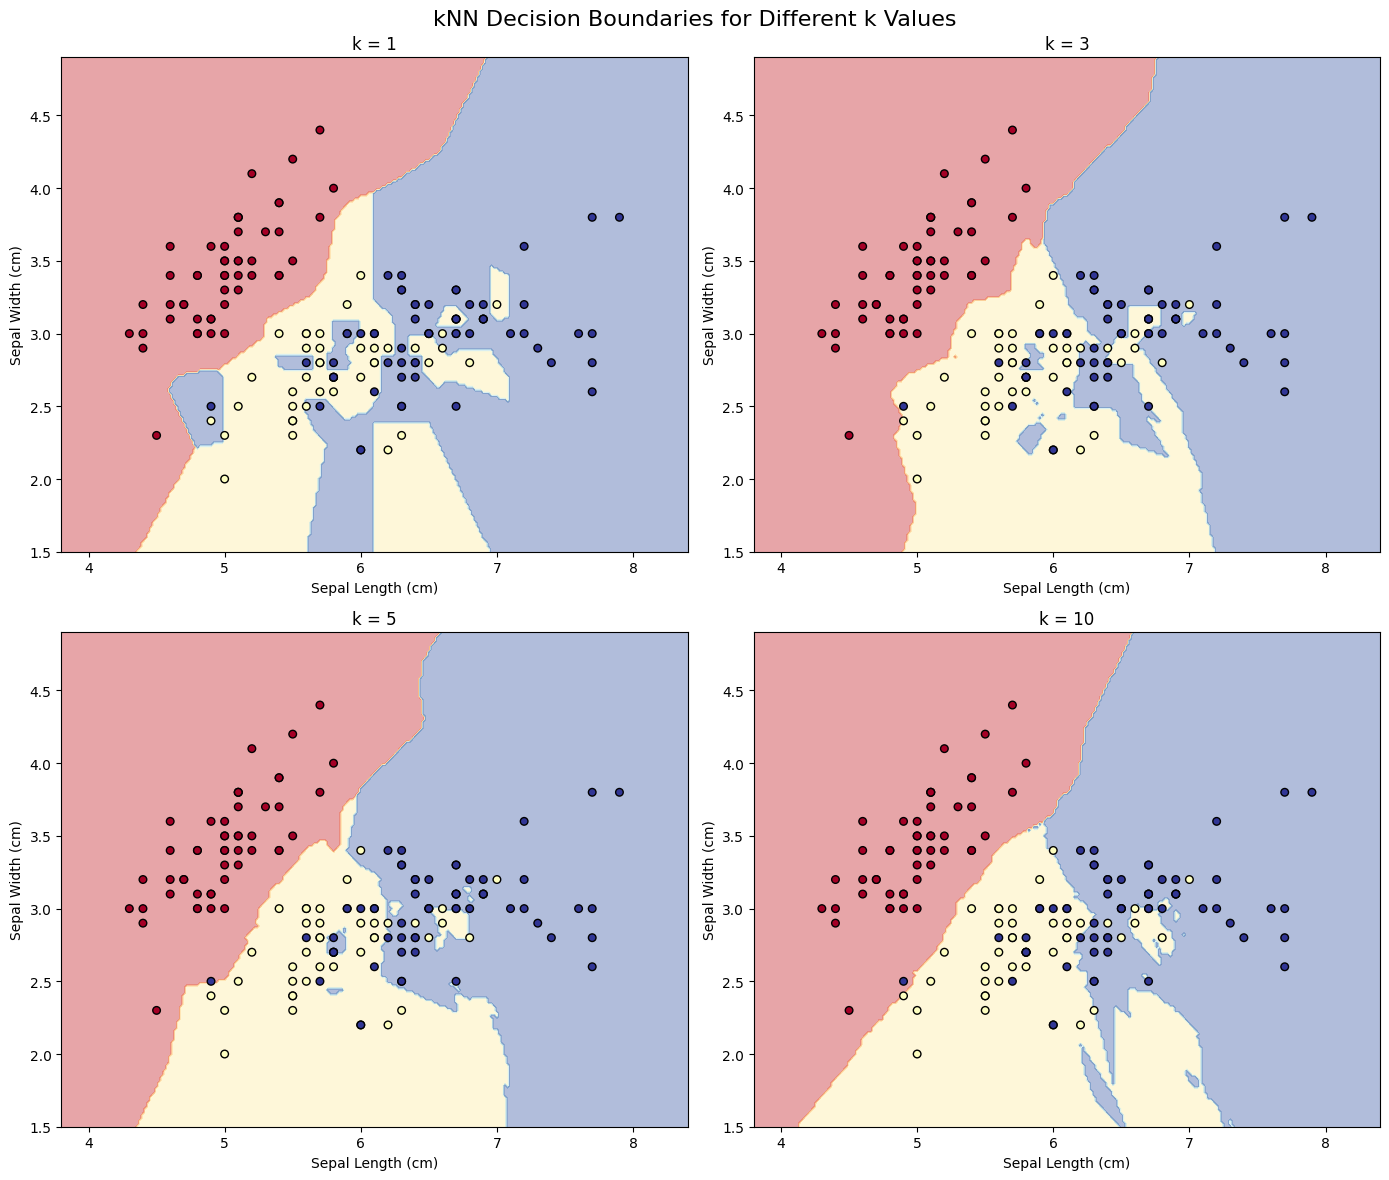

In [11]:
# Cell 10: Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

# Create mesh for decision boundary
h = 0.02
x_min, x_max = X_2features[:, 0].min() - 0.5, X_2features[:, 0].max() + 0.5
y_min, y_max = X_2features[:, 1].min() - 0.5, X_2features[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for idx, k in enumerate(k_values):
    # Predict on mesh
    Z = knn_models[k].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    axes[idx].contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    axes[idx].scatter(X_2features[:, 0], X_2features[:, 1],
                      c=y, cmap='RdYlBu', edgecolor='black', s=30)
    axes[idx].set_xlabel('Sepal Length (cm)')
    axes[idx].set_ylabel('Sepal Width (cm)')
    axes[idx].set_title(f'k = {k}')

plt.suptitle('kNN Decision Boundaries for Different k Values', fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
# Cell 11: Comment on boundary changes
print("\nDECISION BOUNDARY OBSERVATIONS:")
print("="*40)
print("k=1:  Most complex, jagged boundaries - follows each point")
print("k=3:  Smoother boundaries - less sensitive to outliers")
print("k=5:  Even smoother - balanced complexity")
print("k=10: Smoothest boundaries - risk of oversimplification")
print("\nAs k increases, boundaries become smoother (less complex)")


DECISION BOUNDARY OBSERVATIONS:
k=1:  Most complex, jagged boundaries - follows each point
k=3:  Smoother boundaries - less sensitive to outliers
k=5:  Even smoother - balanced complexity
k=10: Smoothest boundaries - risk of oversimplification

As k increases, boundaries become smoother (less complex)


## Q9. Performance Evaluation Programming

In [13]:
# Cell 13: Import metrics libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [14]:
# Cell 14: Train kNN classifier (k=5) on full dataset
# Use all 4 features for better performance
X_full = iris.data
y_full = iris.target

# Split data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

# Train kNN with k=5
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train_full, y_train_full)

# Make predictions
y_pred_final = knn_final.predict(X_test_full)

print("kNN Classifier (k=5) trained on full feature set")
print(f"Accuracy: {knn_final.score(X_test_full, y_test_full):.4f}")

kNN Classifier (k=5) trained on full feature set
Accuracy: 1.0000


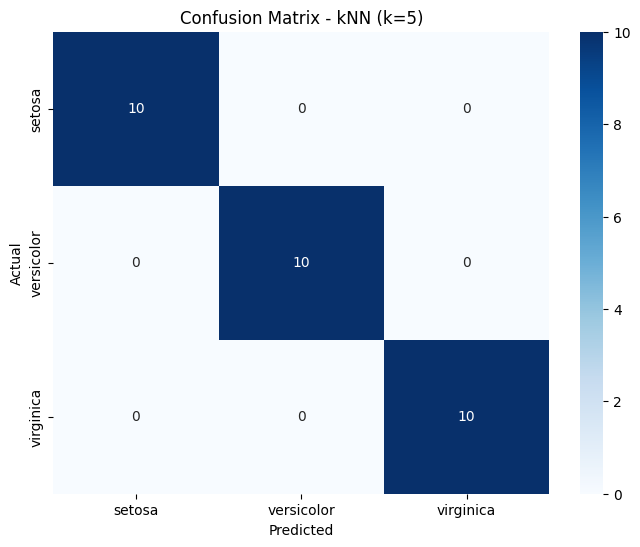

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [15]:
# Cell 15: Display Confusion Matrix
cm = confusion_matrix(y_test_full, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - kNN (k=5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Confusion Matrix:")
print(cm)

In [16]:
# Cell 16: Classification Report
print("\nCLASSIFICATION REPORT:")
print("="*50)
print(classification_report(y_test_full, y_pred_final,
                          target_names=iris.target_names))

# Store metrics for summary
report_dict = classification_report(y_test_full, y_pred_final,
                                   target_names=iris.target_names,
                                   output_dict=True)


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



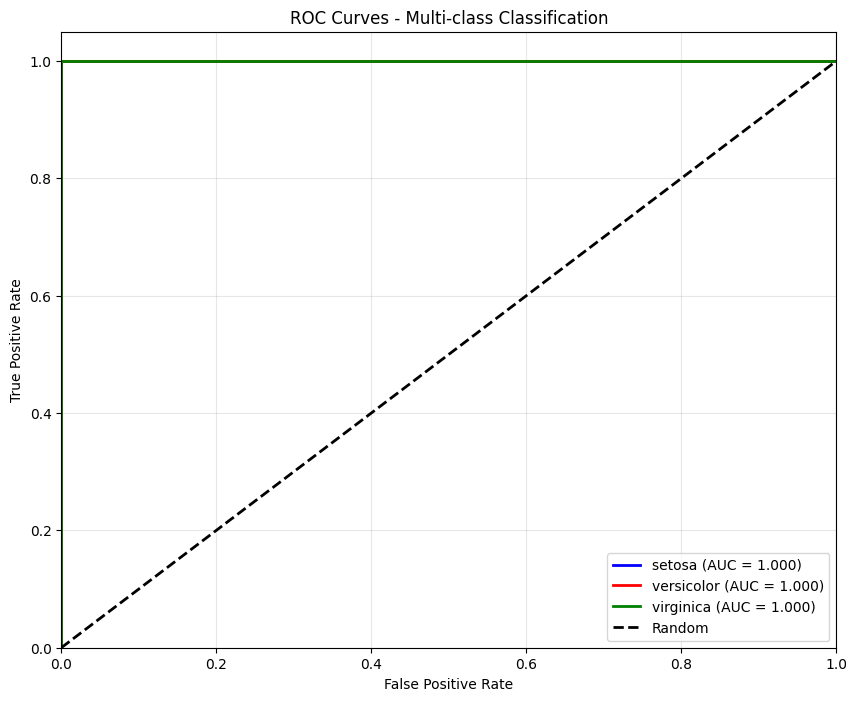

In [17]:
# Cell 17: ROC Curve and AUC
# Binarize for multi-class ROC
y_test_bin = label_binarize(y_test_full, classes=[0, 1, 2])
n_classes = 3

# Get probability predictions
y_score = knn_final.predict_proba(X_test_full)

# Calculate ROC and AUC for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{iris.target_names[i]} (AUC = {roc_auc:.3f})')

# Reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Multi-class Classification')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [18]:
# Cell 18: Summary Statistics
print("\n" + "="*50)
print("FINAL PERFORMANCE SUMMARY")
print("="*50)

accuracy = report_dict['accuracy']
print(f"\nOverall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nPer-Class Metrics:")
for class_name in iris.target_names:
    metrics = report_dict[class_name]
    print(f"\n{class_name}:")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall:    {metrics['recall']:.4f}")
    print(f"  F1-Score:  {metrics['f1-score']:.4f}")

print("\n" + "="*50)
print("Analysis Complete!")


FINAL PERFORMANCE SUMMARY

Overall Accuracy: 1.0000 (100.00%)

Per-Class Metrics:

setosa:
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

versicolor:
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

virginica:
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Analysis Complete!


In [19]:
# Add this cell to double-check the results
print("Verification:")
print(f"Predictions: {y_pred_final}")
print(f"Actual:      {y_test_full}")
print(f"Matches: {np.sum(y_pred_final == y_test_full)} out of {len(y_test_full)}")

# Check if any predictions were wrong
wrong_predictions = np.where(y_pred_final != y_test_full)[0]
if len(wrong_predictions) == 0:
    print("\nAll predictions are correct - 100% accuracy confirmed")
else:
    print(f"\nWrong predictions at indices: {wrong_predictions}")

Verification:
Predictions: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Actual:      [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Matches: 30 out of 30

All predictions are correct - 100% accuracy confirmed


In [20]:
# Try different random states to see if 100% accuracy is consistent
accuracies = []
for seed in range(10):
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_full, y_full, test_size=0.2, random_state=seed, stratify=y_full
    )
    knn_temp = KNeighborsClassifier(n_neighbors=5)
    knn_temp.fit(X_tr, y_tr)
    acc = knn_temp.score(X_te, y_te)
    accuracies.append(acc)
    print(f"Random state {seed}: Accuracy = {acc:.4f}")

print(f"\nAverage accuracy across different splits: {np.mean(accuracies):.4f}")

Random state 0: Accuracy = 1.0000
Random state 1: Accuracy = 0.9667
Random state 2: Accuracy = 0.9667
Random state 3: Accuracy = 0.9333
Random state 4: Accuracy = 0.9333
Random state 5: Accuracy = 0.9667
Random state 6: Accuracy = 0.9333
Random state 7: Accuracy = 1.0000
Random state 8: Accuracy = 0.9667
Random state 9: Accuracy = 1.0000

Average accuracy across different splits: 0.9667
